In [ ]:
from google.colab import drive    #connnecting to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from prophet import Prophet

In [ ]:
!pip install prophet


In [ ]:
# Read the text file without specifying na_values
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',
                 sep=';',
                 parse_dates={'dt': ['Date', 'Time']},
                 infer_datetime_format=True,
                 low_memory=False,
                 index_col='dt')

# Convert the columns to numeric, coercing errors to NaN
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.dtypes)
print(df.head())


print(df.isna().sum())    ## Checking for missing values

<ipython-input-8-5610879d5bf5>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',
<ipython-input-8-5610879d5bf5>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
200

In [ ]:
df.shape

(2075259, 7)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Resampling to daily frequency and calculating the mean for each day
daily_data = df.resample('D').mean()
print(daily_data.head())

# Resampling the dataset to monthly frequency
monthly_data = df.resample('M').mean()
print(monthly_data.head())

            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361       

In [ ]:
# Step 4: Resampling the data to hourly sums
df_hourly = df.resample('H').mean()
df_hourly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


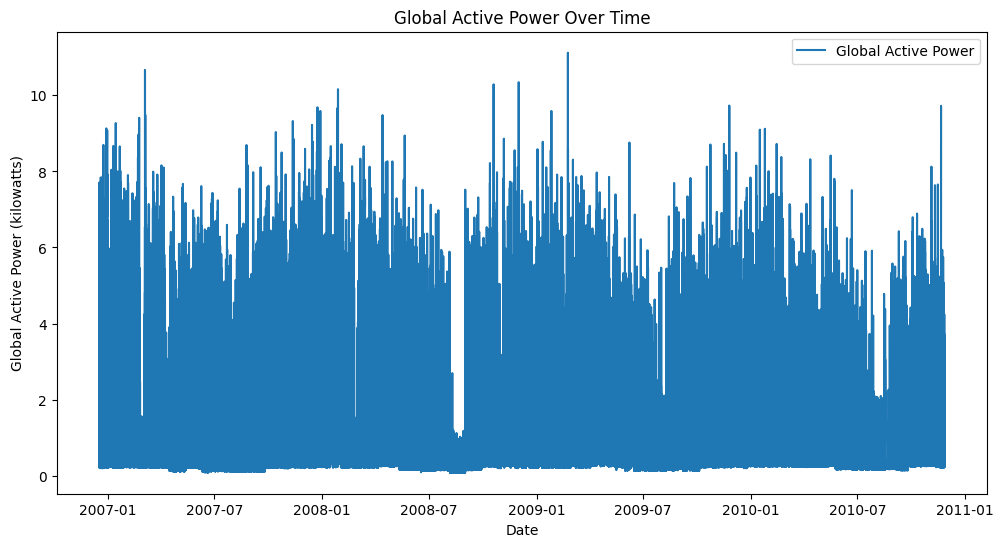

In [ ]:
# the plot of Global_active_power over time
plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()


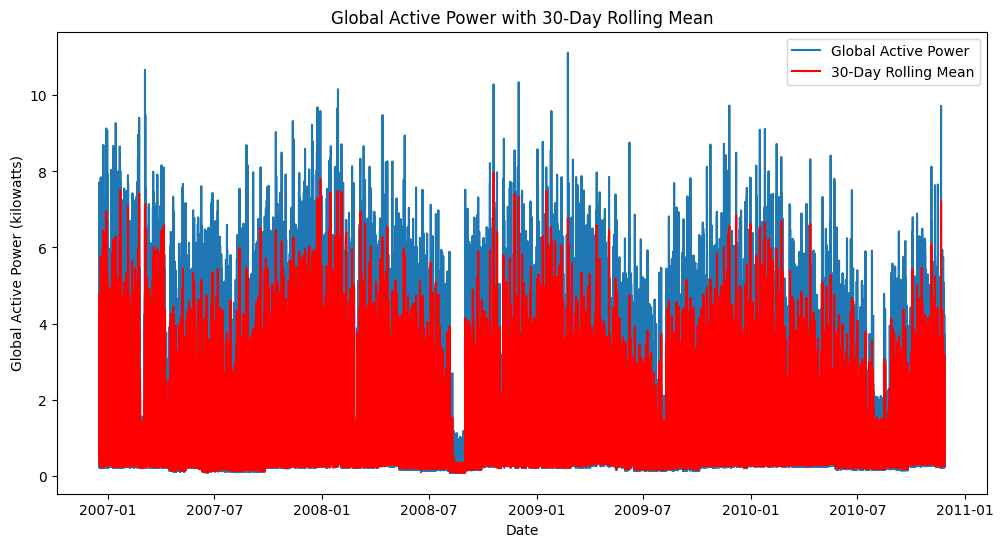

In [ ]:
# Calculate rolling mean with a window of 30 days
rolling_mean = df['Global_active_power'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power with 30-Day Rolling Mean')
plt.legend()
plt.show()

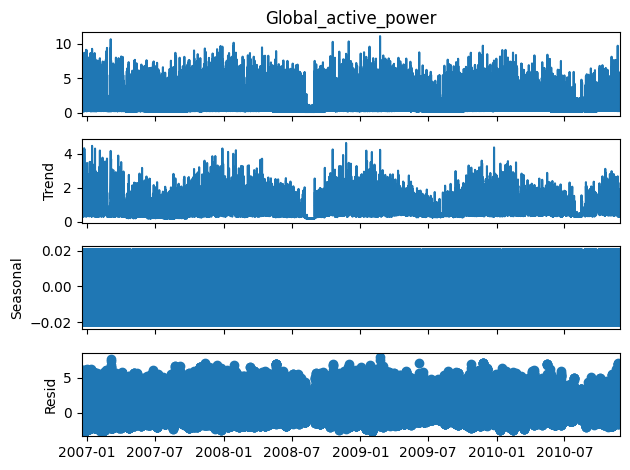

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Global_active_power'].dropna(), model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o96j1jc/wr878g37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o96j1jc/umpwnmvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17159', 'data', 'file=/tmp/tmp_o96j1jc/wr878g37.json', 'init=/tmp/tmp_o96j1jc/umpwnmvt.json', 'output', 'file=/tmp/tmp_o96j1jc/prophet_modelzhsoxpas/prophet_model-20240618204055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:40:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


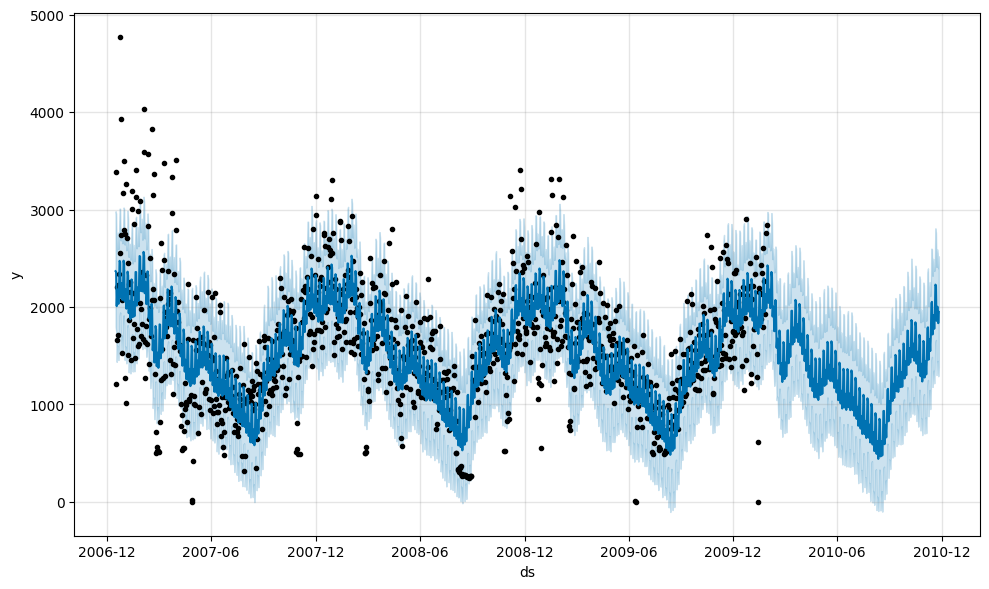

In [ ]:
# Step 4: Resampling the data to daily sums
df_daily = df.resample('D').sum().reset_index()

# Step 5: Preparing the DataFrame for Prophet
df_daily.rename(columns={'dt': 'ds', 'Global_active_power': 'y'}, inplace=True)

# Step 6: Spliting the dataset into train and test sets
train = df_daily.iloc[:-300]
test = df_daily.iloc[-300:]

# Step 7: Initializing and fitting the Prophet model
model = Prophet()
model.fit(train)

# Step 8: Making the future predictions
future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)

# Step 9: Plotting the forecast
fig1 = model.plot(forecast)
plt.show()


Training RMSE: 12.669626197672487
Training MAE: 9.271790838357754
Test RMSE: 21.38027810940144
Test MAE: 17.57473363032061


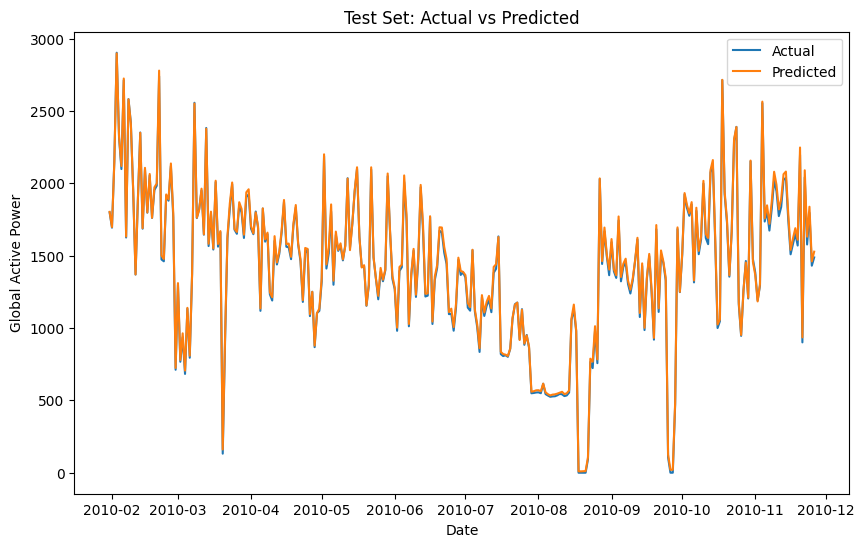

In [ ]:

# Step 9: Evaluating  the model
test_forecast = forecast.iloc[-300:]

# Calculating the RMSE and MAE for both the training and test sets
train_pred = forecast.iloc[:len(train)]['yhat']
test_pred = test_forecast['yhat']

rmse_train = mean_squared_error(train['y'], train_pred, squared=False)
mae_train = mean_absolute_error(train['y'], train_pred)

rmse_test = mean_squared_error(test['y'], test_pred, squared=False)
mae_test = mean_absolute_error(test['y'], test_pred)

print(f'Training RMSE: {rmse_train}')
print(f'Training MAE: {mae_train}')
print(f'Test RMSE: {rmse_test}')
print(f'Test MAE: {mae_test}')

# Step 10: Plotting the test set predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], test_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.title('Test Set: Actual vs Predicted')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o96j1jc/8_y0ru7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o96j1jc/5i7f1nae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24373', 'data', 'file=/tmp/tmp_o96j1jc/8_y0ru7x.json', 'init=/tmp/tmp_o96j1jc/5i7f1nae.json', 'output', 'file=/tmp/tmp_o96j1jc/prophet_model0yrs9pnm/prophet_model-20240618204243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:42:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


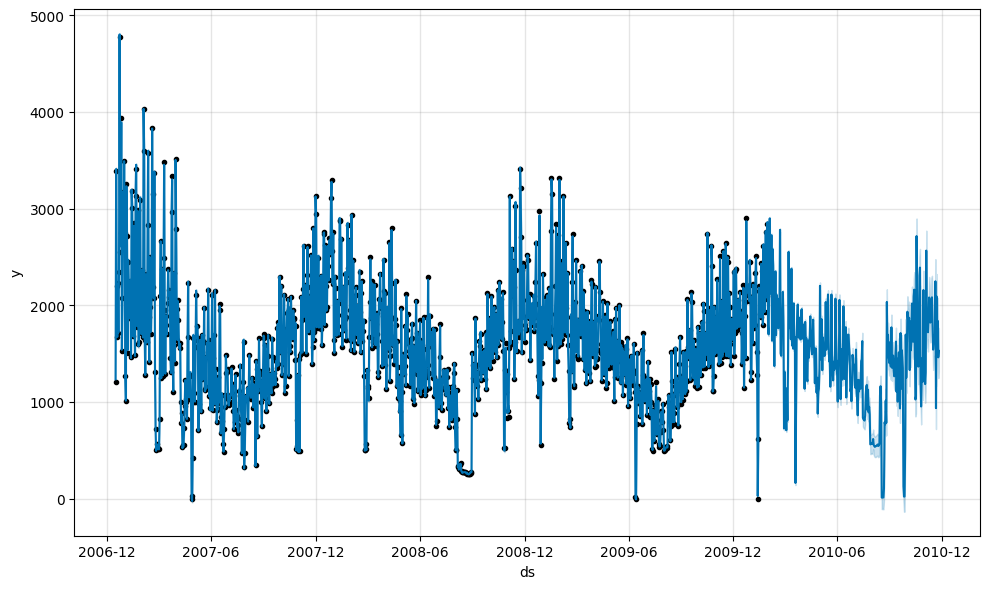

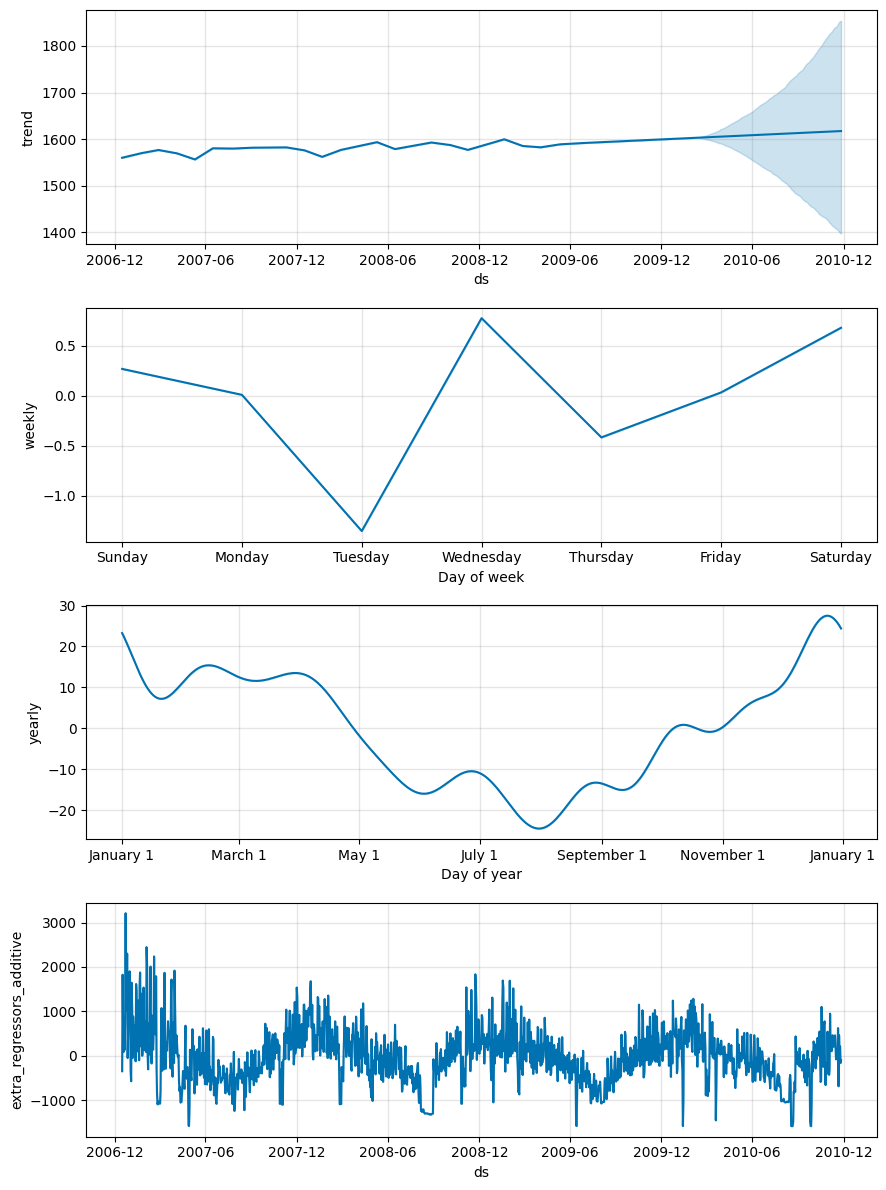

Training RMSE: 12.669626197672487
Training MAE: 9.271790838357754
Test RMSE: 21.38027810940144
Test MAE: 17.57473363032061


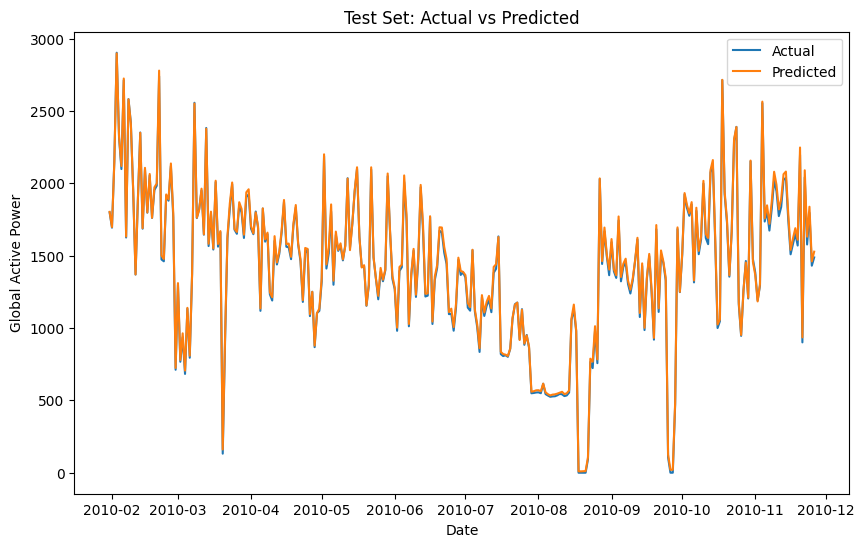

In [ ]:
# Step 4: Renaming the columns for Prophet and to match the regressors
df_daily.rename(columns={
    'dt': 'ds',
    'Global_active_power': 'y',
    'Global_reactive_power': 'add1',
    'Voltage': 'add2',
    'Global_intensity': 'add3',
    'Sub_metering_1': 'add4',
    'Sub_metering_2': 'add5',
    'Sub_metering_3': 'add6'
}, inplace=True)
# Step 5: Splitting the dataset into train and test sets
train = df_daily.iloc[:-300]
test = df_daily.iloc[-300:]

# Step 6: Initializing  the Prophet model
model = Prophet()

# Step 7: Addition of the additional regressors
regressors = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']
for regressor in regressors:
    model.add_regressor(regressor)

# Step 8: Fitting the Prophet model
model.fit(train)

# Step 9: Making the future predictions
future = model.make_future_dataframe(periods=300)

# Ensuring the future DataFrame includes regressors for the prediction period
future = future.merge(df_daily[['ds'] + regressors], on='ds', how='left')

# Making the predictions
forecast = model.predict(future)

# Step 10: Plotting the forecast
fig1 = model.plot(forecast)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

# Step 11: Evaluating the model
test_forecast = forecast.iloc[-300:]

# Calculating RMSE and MAE for both the training and test sets
train_pred = forecast.iloc[:len(train)]['yhat']
test_pred = test_forecast['yhat']

rmse_train = mean_squared_error(train['y'], train_pred, squared=False)
mae_train = mean_absolute_error(train['y'], train_pred)

rmse_test = mean_squared_error(test['y'], test_pred, squared=False)
mae_test = mean_absolute_error(test['y'], test_pred)

print(f'Training RMSE: {rmse_train}')
print(f'Training MAE: {mae_train}')
print(f'Test RMSE: {rmse_test}')
print(f'Test MAE: {mae_test}')

# Step 12: Plotting the test set predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], test_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.title('Test Set: Actual vs Predicted')
plt.show()

In [ ]:
correlation = df['Global_active_power'].corr(df['Voltage'])
correlation = round(correlation, 3)
correlation

-0.4

In [ ]:
correlation_voltage_intensity = df['Voltage'].corr(df['Global_intensity'])
correlation_voltage_intensity = round(correlation_voltage_intensity, 2)
correlation_voltage_intensity

-0.41

In [ ]:
def mape(test, test_forecast):
    return round((np.mean(abs(test - test_forecast)/ mae_test))*100, 2)

In [ ]:
mape_test_pred = mape(test['y'].values, test_pred)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 100.000 %
